Missing values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Distribution of Potability:
 Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


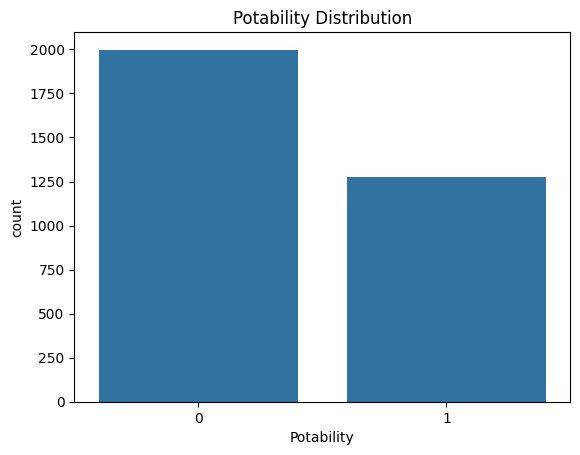

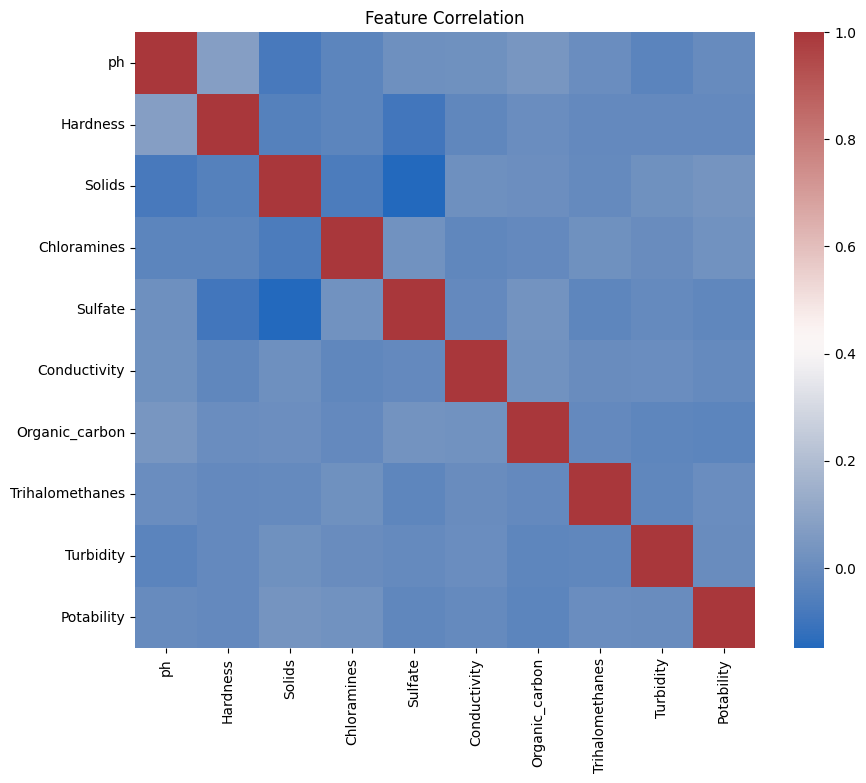

Accuracy: 0.6554878048780488

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.88      0.76       400
         1.0       0.62      0.31      0.41       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.59       656
weighted avg       0.65      0.66      0.62       656



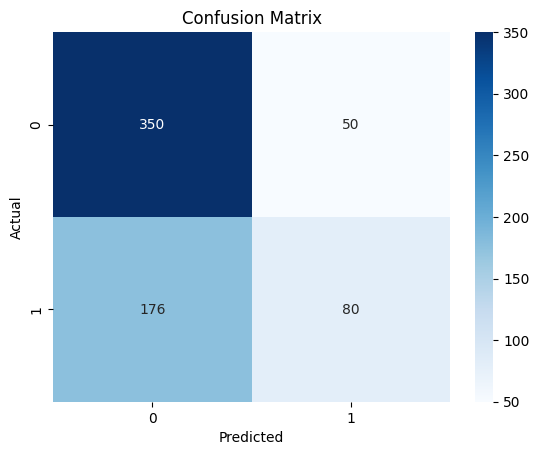

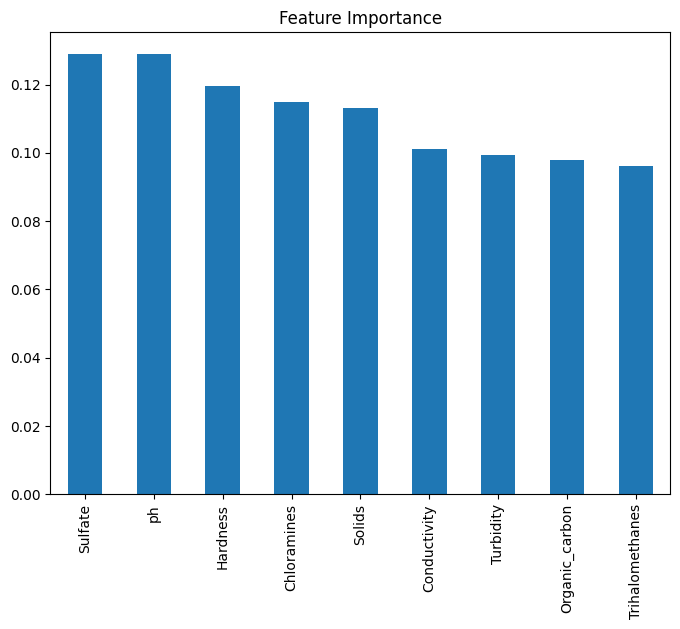

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Potability


In [4]:
# Water_Quality_Classification.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 1. Load the dataset
# Upload 'water_potability.csv' from Kaggle to Colab
df = pd.read_csv('/content/water_potability.csv')
df.head()

# 2. Overview
print("Missing values:\n", df.isnull().sum())
print("\nDistribution of Potability:\n", df['Potability'].value_counts(normalize=True))

# Plot distribution
sns.countplot(x='Potability', data=df)
plt.title('Potability Distribution')
plt.show()

# 3. Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 4. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_imputed.corr(), cmap="vlag", annot=False)
plt.title('Feature Correlation')
plt.show()

# 5. Prepare features and target
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# 6. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 8. Evaluate Model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 9. Feature Importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# 10. Reusable Function
def predict_potability(sample_dict):
    """
    Input: dict of feature values.
    Output: Prediction (0 = not potable, 1 = potable).
    """
    sample = pd.DataFrame([sample_dict])
    sample = pd.DataFrame(imputer.transform(sample), columns=sample.columns)
    prediction = clf.predict(sample)[0]
    return "Potable" if prediction == 1 else "Not Potable"

# Example call
example = X_test.iloc[0].to_dict()
print("Example prediction:", predict_potability(example))
